# Predicting Newsletter Subscription from Demographics and Play Behavior

## Introduction

**Background**: The UBC Minecraft server project collects player data to help manage server resources and improve player engagement strategies. One key goal is to understand what kinds of players are likely to subscribe to the server newsletter, which serves as a way to share updates and strengthen the community.

**Question**: This project investigates the following question:

*Can we predict whether a player will subscribe to the newsletter based on their age and total number of hours played?*

To answer this question, we will use data from the following source:

- `players.csv`, which contains each player's demographic information (including age), total number of hours played (`played_hours`), and subscription status (`subscribe`).

This project focuses only on the `players.csv` dataset. By using demographic information (`Age`) and behavioral information (`played_hours`), we aim to determine whether these variables are useful predictors of newsletter subscription.

We chose this approach because:
- Age may relate to interest in community updates.
- Players who spend more time in-game may be more engaged and thus more likely to subscribe.

**Data Description**

This project uses the dataset `players.csv`, which contains demographic, behavioral, and subscription information for 196 unique players.

We use two variables—`Age` and `played_hours`—to investigate whether they are useful predictors of newsletter subscription status.

**Dataset Overview**

#### players.csv

| Variable Name | Type    | Description                                  |
|---------------|---------|----------------------------------------------|
| hashedEmail   | String  | Unique identifier for each player            |
| age           | Numeric | Player's reported age                        |
| gender        | String  | Player's reported gender                     |
| subscribe     | Boolean | Whether the player subscribed (TRUE/FALSE)  |
| experience    | String  | Self-reported experience level               |
| played_hours  | Numeric | Total number of hours the player has played |
| name          | String  | Player's chosen username                     |


## Methods & Results

To explore whether a player's age and total played time can help predict their newsletter subscription status, we followed several steps:

### Data Processing

- We used the players.csv dataset, which contains each player's age, total played hours, and subscription status.
- We kept only the necessary columns: Age, played_hours, and subscribe.

### Splitting the Data

- We split the dataset into a training set (75%) and a testing set (25%) using random sampling.
- The training set was used to teach the model how age and played hours might relate to newsletter subscription.
- The testing set was used to evaluate how well the model performs on new, unseen data.

### Model

- We trained a K-nearest neighbors (KNN) classification model using Age and played_hours as the predictor variables, and subscribe as the response.
- The model identifies patterns in training data to classify new players as likely subscribers or not.

### Evaluation

- We evaluated the model using accuracy, which measures the proportion of correct predictions on the test set.
- A higher accuracy means that Age and played_hours are useful predictors of subscription status.

This analysis helps us understand whether player demographics (age) and behavior (play time) are useful indicators of newsletter interest.

In [17]:
library(tidyverse)
library(tidymodels)

# Data Processing
players <- read_csv("players.csv") |>
    select(Age, played_hours, subscribe) |>
    filter(played_hours <= 20, Age <= 35) |>
    mutate(subscribe = as.factor(subscribe))

# Splitting the Data
set.seed(123)
split <- initial_split(players, prop = 0.75)
train_data <- training(split)
test_data <- testing(split)

# Model
knn_recipe <- recipe(subscribe ~ Age + played_hours, data = train_data) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(mode = "classification", neighbors = 5) |>
    set_engine("kknn")

knn_workflow <- workflow() |>
    add_recipe(knn_recipe) |>
    add_model(knn_spec)

knn_fit <- fit(knn_workflow, data = train_data)

# Evaluation
my_predict <- knn_fit |>
  predict(test_data) |>
  bind_cols(test_data)

accuracy(my_predict, truth = subscribe, estimate = .pred_class)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6818182


### Exploratory Visualization

We used histograms to compare `played_hours` and `Age` distributions between subscribed and non-subscribed players.

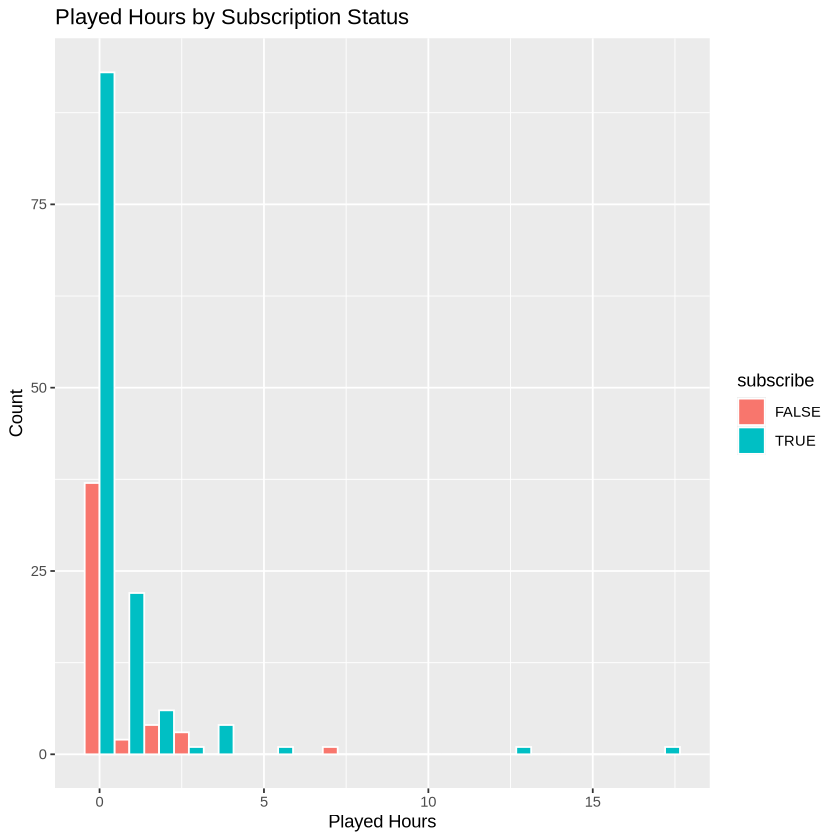

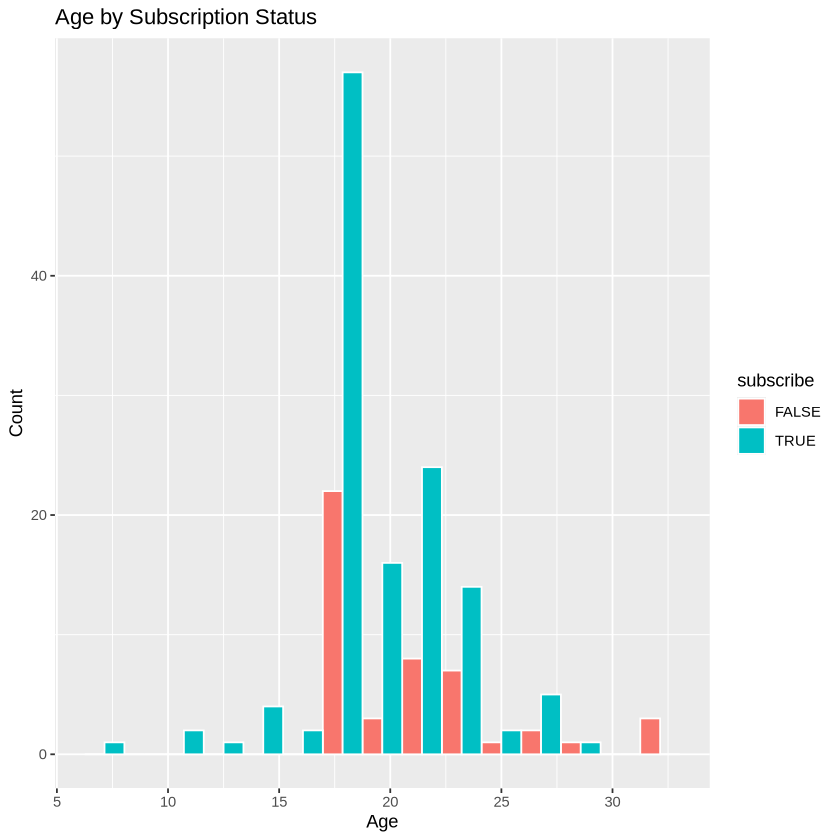

In [18]:
ggplot(players, aes(x = played_hours, fill = subscribe)) +
    geom_histogram(position = "dodge", bins = 20, color = "white") +
    labs(x = "Played Hours", 
         y = "Count",
         title = "Played Hours by Subscription Status")

ggplot(players, aes(x = Age, fill = subscribe)) +
    geom_histogram(position = "dodge", bins = 15, color = "white") +
    labs(x = "Age", 
         y = "Count",
         title = "Age by Subscription Status")

These histograms show how player behavior and demographics relate to newsletter subscription.

- **Played Hours**: Players who subscribed tend to play more. Subscribed players are more concentrated in higher play-hour ranges, suggesting a positive relationship.
- **Age**: Subscribed players are more common across most age groups, especially between 17 and 20. While the difference isn’t dramatic across all ages, this suggests age could play a role in subscription behavior, likely alongside other factors.

## Discussion

We identified and removed extreme values in both variables. Most players had less than 20 total played hours and were under 35 years old. These observations guided us to filter the data to focus on the core player group. After training a K-nearest neighbors (KNN) classification model using `Age` and `played_hours` as predictor variables, the model achieved an accuracy of approximately **68.2%** on the testing set. 

The result suggests that player demographics and behavioral time investment can moderately predict newsletter subscription. While not highly accurate, it does have real-world meaning.

However, the moderate performance also implies that other unobserved factors may play a more important role in predicting subscription. To further improve the analysis, in the future we could include additional variables or try alternative models, and so on. 

## Conclusion

This project aimed to predict whether a player would subscribe to the UBC Minecraft server newsletter based on two variables: `Age` and `played_hours`. After building a K-nearest neighbors (KNN) classification model, we achieved an accuracy of approximately **68%**.

This result suggests that while `Age` and `played_hours` carry **some predictive power**, they are **not strong enough alone** to make highly accurate predictions. However, they offer a useful starting point for understanding player behavior and engagement. Future work incorporating more features or alternative models may yield more insights into player engagement and help guide social communication strategies.